<a href="https://colab.research.google.com/github/juditcanovas/EDA_Laboratorio_Cromatografia/blob/main/EDA_Datos_Cromatografia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np # operaciones numéricas (como generar números aleatorios)
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Configuración para una mejor visualización de los gráficos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

# Parámetros de la simulación
num_muestras = 500
num_lotes = 5
fechas_inicio = datetime(2024, 1, 1)
fechas_fin = datetime(2024, 6, 25)

# Nombres de los lotes
lotes = [f"Lote {chr(65 + i)}" for i in range(num_lotes)]

# Generación de los datos
data = {
    'ID_Muestra': range(1, num_muestras + 1),
    'Lote_Muestra': np.random.choice(lotes, num_muestras),
    'Fecha_Analisis': [fechas_inicio + timedelta(days=np.random.randint(0, (fechas_fin - fechas_inicio).days)) for _ in range(num_muestras)],
    'Temperatura_Columna_C': np.random.normal(30, 1.5, num_muestras).round(1), # Temperatura en °C
    'Presion_Bomba_MPa': np.random.normal(15, 0.8, num_muestras).round(2), # Presión en MPa
    'Tiempo_Retencion_Analito_A_min': np.random.normal(5.2, 0.1, num_muestras).round(2), # Tiempo de retención en minutos
    'Area_Pico_Analito_A': np.random.normal(150000, 15000, num_muestras).round(0), # Área del pico
    'Pureza_Muestra_Porcentaje': np.random.normal(98.5, 0.5, num_muestras).round(2) # Pureza en %
}

df = pd.DataFrame(data)

# Introducir algunas anomalías/tendencias para el EDA

# 1. Un lote con pureza ligeramente menor
df.loc[df['Lote_Muestra'] == 'Lote C', 'Pureza_Muestra_Porcentaje'] = np.random.normal(97.0, 0.8, df[df['Lote_Muestra'] == 'Lote C'].shape[0]).round(2)

# 2. Una ligera tendencia de aumento en el tiempo de retención con el tiempo
df['Tiempo_Retencion_Analito_A_min'] = df['Tiempo_Retencion_Analito_A_min'] + (df['Fecha_Analisis'] - df['Fecha_Analisis'].min()).dt.days / 1000

# 3. Algunas muestras con pureza atípicamente baja
num_anomalias_pureza = 5
indices_anomalias = np.random.choice(df.index, num_anomalias_pureza, replace=False)
df.loc[indices_anomalias, 'Pureza_Muestra_Porcentaje'] = np.random.uniform(90, 95, num_anomalias_pureza).round(2)

# 4. Algunas muestras con área de pico atípicamente alta
num_anomalias_area = 3
indices_anomalias_area = np.random.choice(df.index, num_anomalias_area, replace=False)
df.loc[indices_anomalias_area, 'Area_Pico_Analito_A'] = np.random.uniform(200000, 250000, num_anomalias_area).round(0)


print("¡Datos simulados generados con éxito!")
print("\nPrimeras 5 filas del DataFrame:")
print(df.head())
print("\nInformación general del DataFrame:")
print(df.info())

¡Datos simulados generados con éxito!

Primeras 5 filas del DataFrame:
   ID_Muestra Lote_Muestra Fecha_Analisis  Temperatura_Columna_C  \
0           1       Lote D     2024-03-12                   31.2   
1           2       Lote B     2024-02-06                   29.0   
2           3       Lote E     2024-05-01                   32.4   
3           4       Lote E     2024-02-23                   31.1   
4           5       Lote C     2024-03-17                   28.5   

   Presion_Bomba_MPa  Tiempo_Retencion_Analito_A_min  Area_Pico_Analito_A  \
0              13.93                           5.371             138636.0   
1              15.29                           5.306             146728.0   
2              14.63                           5.281             149316.0   
3              14.80                           5.363             143861.0   
4              15.77                           5.316             148767.0   

   Pureza_Muestra_Porcentaje  
0                      98.


 Análisis Exploratorio de Datos con Visualizaciones


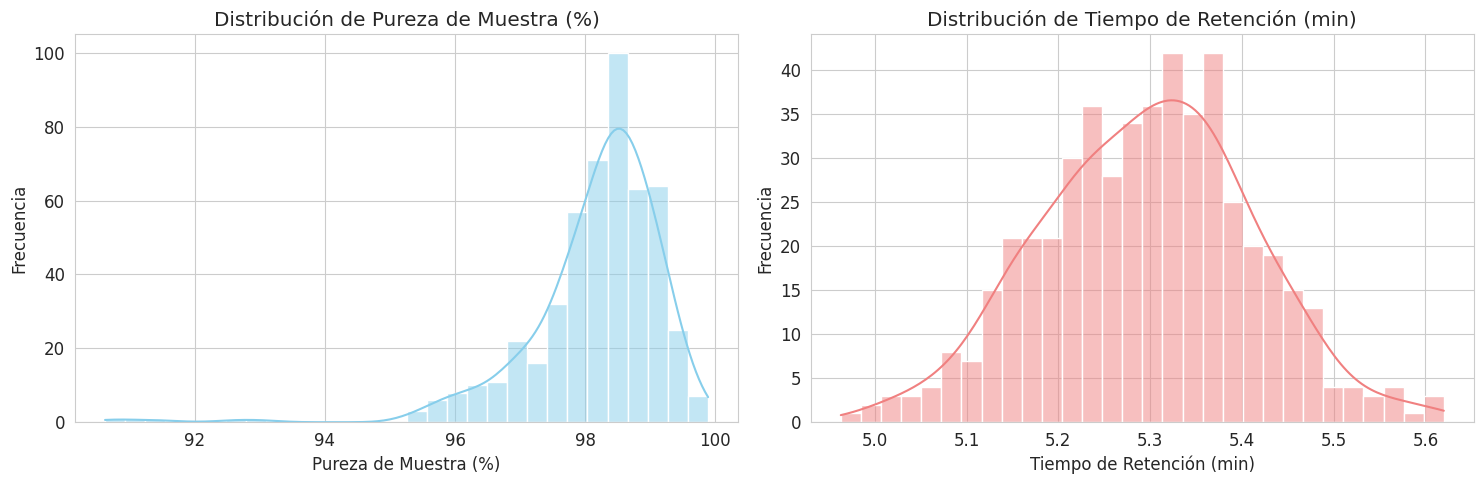

In [ ]:
print("\n Análisis Exploratorio de Datos con Visualizaciones")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Pureza_Muestra_Porcentaje'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de Pureza de Muestra (%)')
plt.xlabel('Pureza de Muestra (%)')
plt.ylabel('Frecuencia')
plt.savefig('distribucion_pureza.png')

plt.subplot(1, 2, 2)
sns.histplot(df['Tiempo_Retencion_Analito_A_min'], kde=True, bins=30, color='lightcoral')
plt.title('Distribución de Tiempo de Retención (min)')
plt.xlabel('Tiempo de Retención (min)')
plt.ylabel('Frecuencia')
plt.savefig('distribucion_tiempo_retencion.png')
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-2421779597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Lote_Muestra', y='Pureza_Muestra_Porcentaje', data=df, palette='viridis')


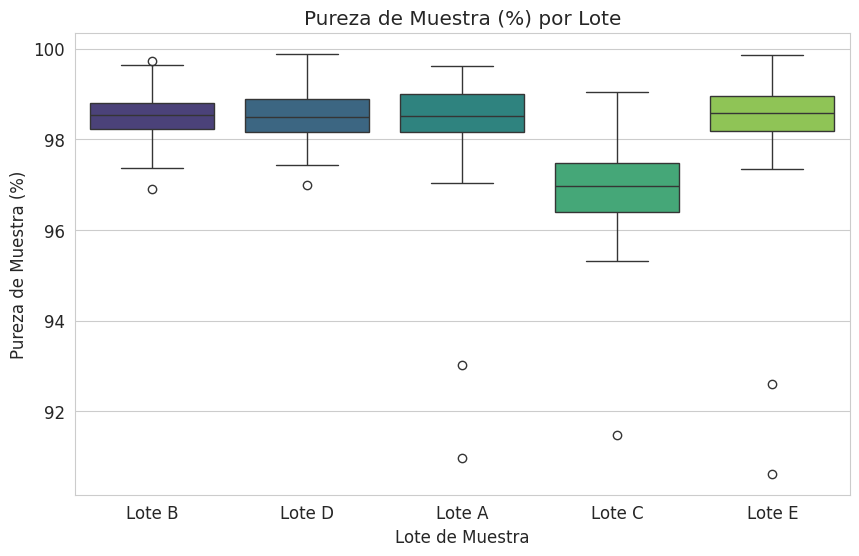

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Lote_Muestra', y='Pureza_Muestra_Porcentaje', data=df, palette='viridis')
plt.title('Pureza de Muestra (%) por Lote')
plt.xlabel('Lote de Muestra')
plt.ylabel('Pureza de Muestra (%)')
plt.show()

/tmp/ipython-input-11-3331857156.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Lote_Muestra', y='Tiempo_Retencion_Analito_A_min', data=df, palette='viridis')


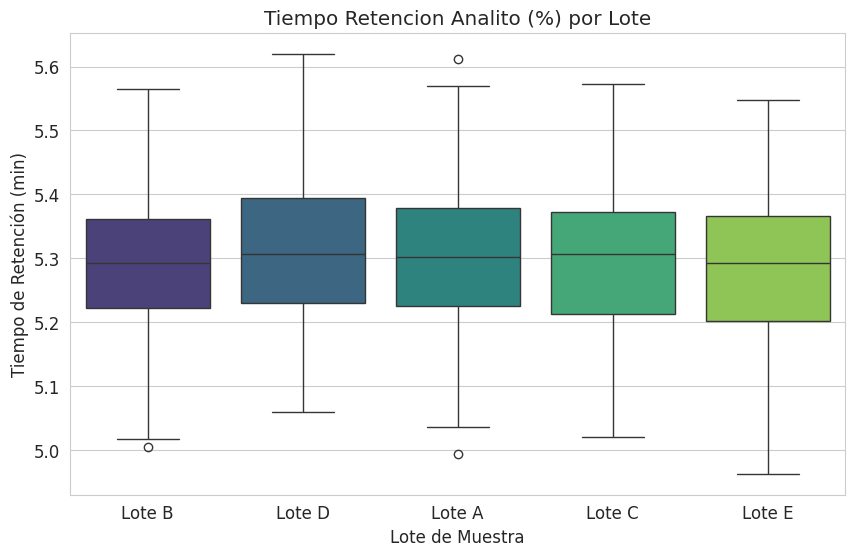

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Lote_Muestra', y='Tiempo_Retencion_Analito_A_min', data=df, palette='viridis')
plt.title('Tiempo Retencion Analito (%) por Lote')
plt.xlabel('Lote de Muestra')
plt.ylabel('Tiempo de Retención (min)')
plt.show()

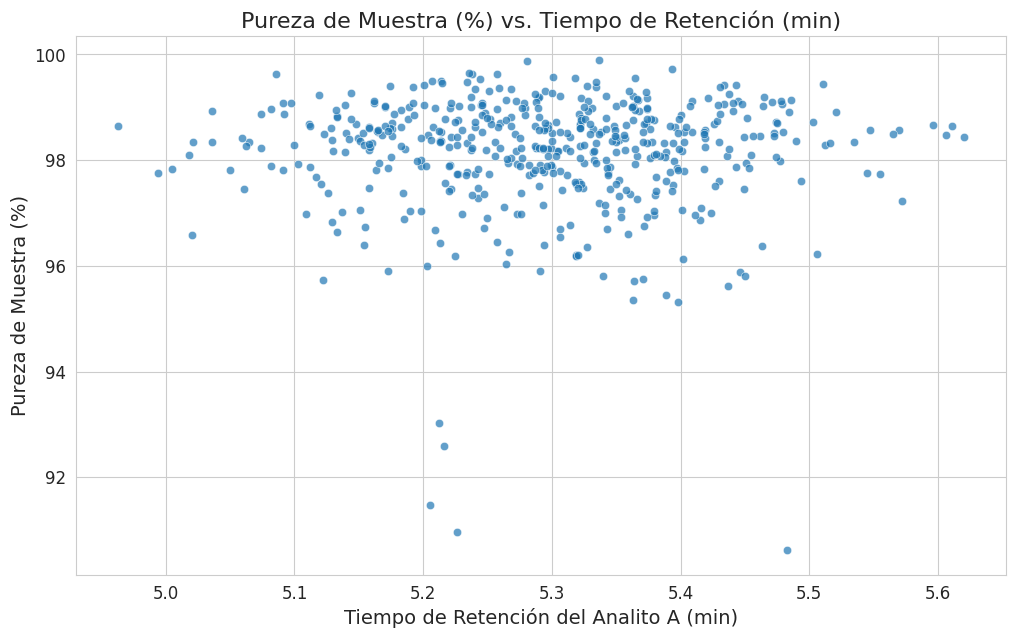

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd #No haria falta todo esto ya que al inicio ya se ejecuta todo

plt.figure(figsize=(12,7))
sns.scatterplot(x='Tiempo_Retencion_Analito_A_min', y= 'Pureza_Muestra_Porcentaje', data= df, alpha = 0.7)
plt.title('Pureza de Muestra (%) vs. Tiempo de Retención (min)', fontsize=16)
plt.xlabel('Tiempo de Retención del Analito A (min)', fontsize=14)
plt.ylabel('Pureza de Muestra (%)', fontsize=14)
plt.grid(True) #Añade cuadricula al grafico
plt.savefig('pureza_vs_tiempo_retencion_scatter.png')
plt.show()

In [3]:
# Cálculo del Coeficiente de Correlación de Pearson entre ambos
correlation = df['Pureza_Muestra_Porcentaje'].corr(df['Tiempo_Retencion_Analito_A_min'])
print(f'Coeficiente de correlación entre Pureza de Muestra y Tiempo de Retención: {correlation:.4f}')




Coeficiente de correlación entre Pureza de Muestra y Tiempo de Retención: 0.0061


In [4]:
# Interpretación básica del coeficiente de correlación
if correlation > 0.7:
    print("Existe una fuerte correlación positiva. A mayor tiempo de retención, mayor pureza (o viceversa).")
elif correlation < -0.7:
    print("Existe una fuerte correlación negativa. A mayor tiempo de retención, menor pureza (o viceversa).")
elif correlation > 0.3:
    print("Existe una correlación positiva moderada.")
elif correlation < -0.3:
    print("Existe una correlación negativa moderada.")
else:
    print("La correlación lineal es débil o inexistente. Esto no descarta otras relaciones no lineales.")

La correlación lineal es débil o inexistente. Esto no descarta otras relaciones no lineales.


**- Visión general de las variables clave:**
Se puede observar una mayor distribución de la pureza en el rango de 98-99%. También se observa una "cola" en la zona de 96%, pero no de forma muy significante. En cuanto a los tiempos de retención del analito, hay una mayor concentración sobre los 5,3 min.